## **Explode Method in Pandas**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('D:\\python Programming\\DataSets\\data_jobs.csv')

# Performing some cleanups

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Performing a extra cleanup**

In [2]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df[['job_title_short','job_skills']].head(10)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
5,Data Engineer,"[python, sql, gcp]"
6,Senior Data Engineer,"[sql, python, java, sql server, gcp, bigquery,..."
7,Data Engineer,"[sql, nosql, gcp, azure, aws, bigquery, databr..."
8,Business Analyst,"[excel, powerpoint, power bi]"
9,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."


### **Now running the explode method on the job_skills method**

<Axes: xlabel='job_skills'>

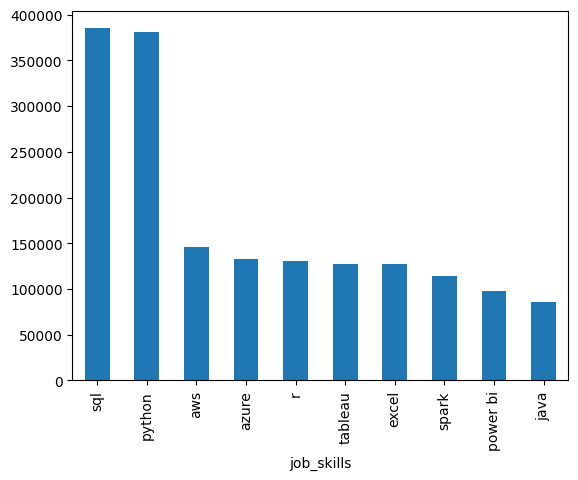

In [4]:
df_exploded = df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [5]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [6]:
df_skills_count = skills_count.reset_index(name = 'skills_count')
df_skills_count

,job_title_short,job_skills,skills_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [30]:
df_skills_count = df_skills_count.sort_values(by = 'skills_count',ascending = False)

In [31]:
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
2028,Software Engineer,asp.netcore,1
45,Business Analyst,digitalocean,1
1920,Senior Data Scientist,objective-c,1


In [32]:
title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skills_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


In [40]:
df_skills_final.rename(columns={'skills_count': 'skills count'}, inplace=True)


**Plotting the Data**

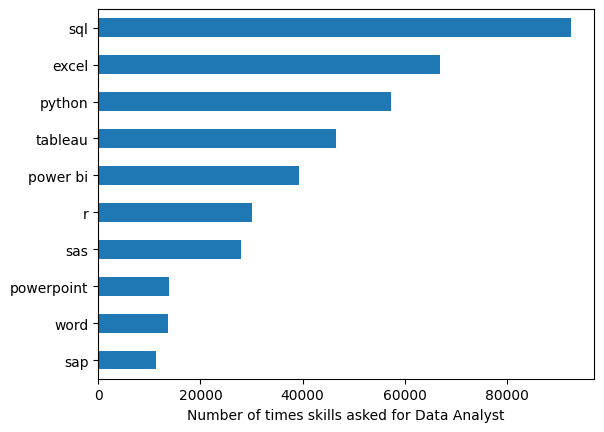

In [46]:

df_skills_final.plot(kind = 'barh' ,x = 'job_skills',y = 'skills count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.xlabel(f"Number of times skills asked for {title}")
plt.ylabel('')
plt.show()
# Inorder to invert the axis we can use the invert_xaxis() or invert_yaxis() methods but this methods can only be called on the axis object and to get it we have to use the plt.gca() method
